# Introduction  

This project focuses on **Car Price Prediction** using machine learning techniques. The goal is to build a model that can accurately estimate the price of a car based on its features such as engine specifications, fuel type, number of doors, and other categorical and numerical attributes.  

### Workflow of this Notebook  
1. **Data Loading** – Importing the dataset with `pandas` and checking its shape.  
2. **Exploratory Data Analysis (EDA)** – Understanding the dataset structure, handling missing values, and observing important features like `Engine HP`, `Cylinders`, `Fuel Type`, etc.  
3. **Data Wrangling** – Cleaning and preprocessing the dataset (handling missing values, duplicates, and encoding categorical features).  
4. **Feature Engineering** – Selecting and transforming the most relevant features for prediction.  
5. **Model Building** – Training machine learning models such as simple and multiple Linear Regression, multivariate polynomial regression model, **ridge regression model using GridSearchCV** finding the best parameters for alpha and polynomial degree values.   
6. **Model Evaluation** – Evaluating the performance of the models using metrics like **R² score**, **Mean Absolute Error (MAE)**, and **Root Mean Squared Error (RMSE)**.  

### Libraries Used :  
- **NumPy** and **Pandas** → Data handling and manipulation  
- **Matplotlib** and **Seaborn** → Data visualization and insights  
- **Scikit-learn** → Preprocessing, model training, and evaluation  


In [56]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cardataset/data.csv


# Data loading

In [57]:
cdf=pd.read_csv("/kaggle/input/cardataset/data.csv")
print("dataset : row*column", cdf.shape)


dataset : row*column (11914, 16)


In [58]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [59]:
#finding the missing datas
#missing_data=cdf.isnull()
#to find the missing count from columns in a dataframe
#for col in missing_data.columns.values.tolist():
  #  print(missing_data[col].value_counts())
   # print(" ")
#simpler way!
print(cdf.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


**Observation**

* **Engine Fuel Type  : 3      >>>>**
* **Engine HP         : 69     >>>>**    
* **No of Doors       : 6      >>>>**
* **Engine Cylinders  : 30     >>>>**
* **Market Category   : 3742   >>>>**


# Data wrangling

In [60]:
#droping the market category due to high amount of missin datas
cdf=cdf.drop(columns="Market Category")

#filling NaN values of doors column with most common value
cdf["Number of Doors"]=cdf["Number of Doors"].fillna(cdf["Number of Doors"].mode()[0])
cdf["Number of Doors"].value_counts().sum()

#taking avg HP and replacing the existing NaN
cdf["Engine HP"]=cdf["Engine HP"].fillna(cdf["Engine HP"].mean())
cdf["Engine HP"].value_counts().sum()

#since vehicle is a budget vehicel and prodcuing low hp , fill NaN with most common value of fuel type
print(cdf["Engine Fuel Type"].value_counts())
cdf[cdf["Engine Fuel Type"].isna()]
cdf["Engine Fuel Type"]=cdf["Engine Fuel Type"].fillna(cdf["Engine Fuel Type"].mode()[0])

Engine Fuel Type
regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64


**Creating a RandomForestClassifier model**

In [61]:
#creating a RandomForest model for predicting the missing Engine cylinder values
train_data=cdf[cdf["Engine Cylinders"].notna()]
missing_data=cdf[cdf["Engine Cylinders"].isna()]

factors=["Engine HP","city mpg"]

x_train=train_data[factors]
y_train=train_data["Engine Cylinders"]

x_missing=missing_data[factors]

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(x_train,y_train)
predicted_cv=model.predict(x_missing)

#adding the model predicted values to the column Engine Cylinders
cdf.loc[cdf["Engine Cylinders"].isna(),"Engine Cylinders"]=predicted_cv


print(cdf.isna().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


Data is cleaned successfully!

In [62]:
cdf.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# EDA

Grouping to analyze avg cost based on the make,vehicle size and style 

In [63]:
grouped_cdf=cdf.groupby(["Make","Vehicle Size","Vehicle Style"])["MSRP"].mean().round()
grouped_cdf.head(100)

#covert the grouped series back into dataframe
groupcdf=grouped_cdf.reset_index()
groupcdf

,Make,Vehicle Size,Vehicle Style,MSRP
0,Acura,Compact,2dr Hatchback,17176.0
1,Acura,Compact,Coupe,102400.0
2,Acura,Compact,Sedan,23509.0
3,Acura,Midsize,4dr Hatchback,51063.0
4,Acura,Midsize,4dr SUV,42960.0
...,...,...,...,...
459,Volvo,Large,Sedan,51650.0
460,Volvo,Midsize,4dr SUV,43534.0
461,Volvo,Midsize,Coupe,2000.0
462,Volvo,Midsize,Sedan,18614.0


In [64]:
grouped_cdf=cdf.groupby(["Make","Engine HP","Vehicle Style"])["MSRP"].mean().round()
grouped_cdf

Make   Engine HP  Vehicle Style
Acura  111.0      Sedan            31750.0
       140.0      2dr Hatchback    11803.0
                  Sedan            12158.0
       150.0      Sedan            29383.0
       155.0      2dr Hatchback    21350.0
                                    ...   
Volvo  325.0      4dr SUV          48400.0
                  Sedan            44600.0
                  Wagon            46388.0
       345.0      Sedan            59700.0
                  Wagon            61300.0
Name: MSRP, Length: 1873, dtype: float64

<Figure size 1200x1400 with 0 Axes>

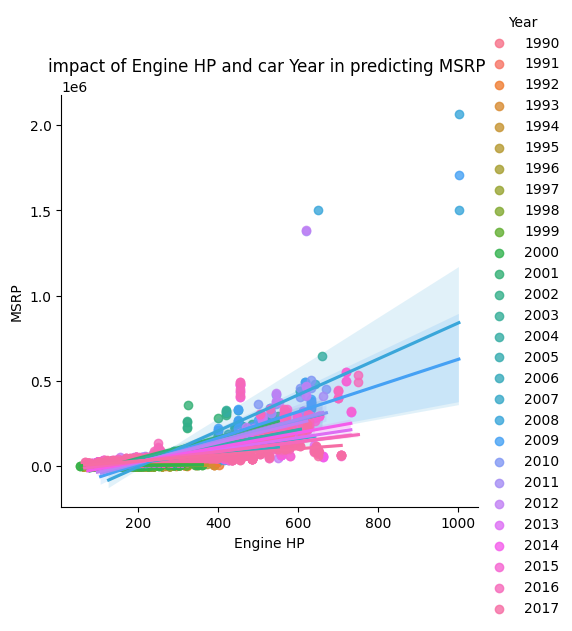

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")

plt.figure(figsize=(12,14))
sns.lmplot(x="Engine HP", y="MSRP", hue="Year", data=cdf)
plt.title("impact of Engine HP and car Year in predicting MSRP ")
plt.show()


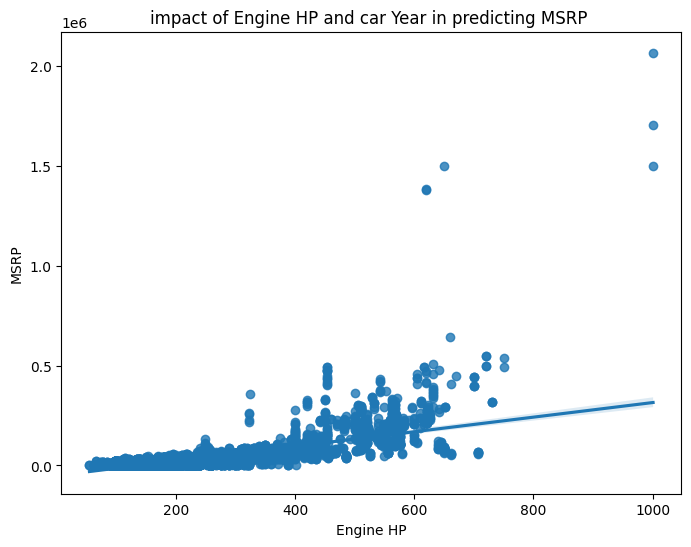

In [66]:
plt.figure(figsize=(8,6))
sns.regplot(x="Engine HP", y="MSRP", data=cdf)
plt.title("impact of Engine HP and car Year in predicting MSRP ")
plt.show()

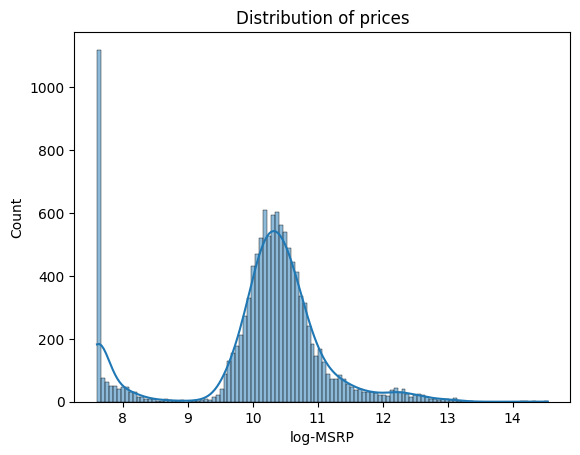

In [67]:
cdf["MSRP"].value_counts()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# indicates most values are less and some high values >> perform log transform
cdf["log-MSRP"]=np.log(cdf["MSRP"])

sns.histplot(cdf["log-MSRP"],kde=True)
plt.title("Distribution of prices")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

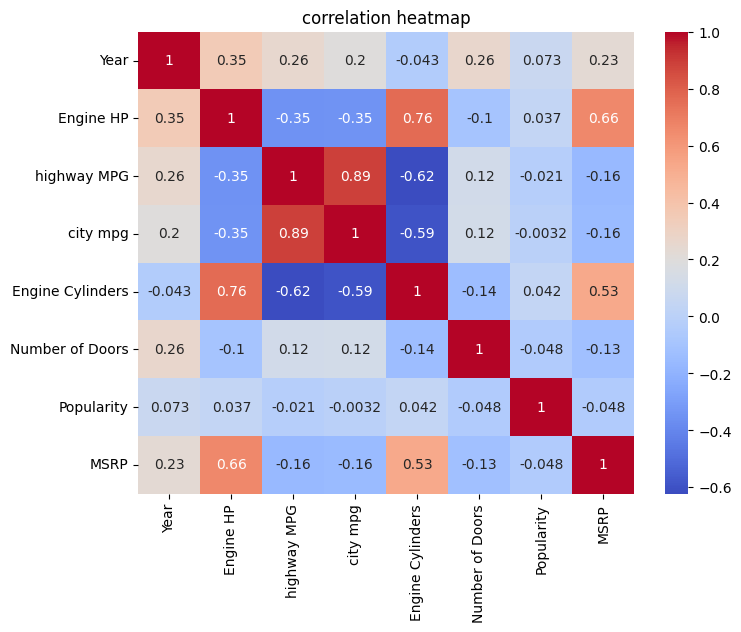

In [68]:
num_val=["Year","Engine HP","highway MPG","city mpg","Engine Cylinders","Number of Doors","Popularity","MSRP"]
corr_matrix=cdf[num_val].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("correlation heatmap")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

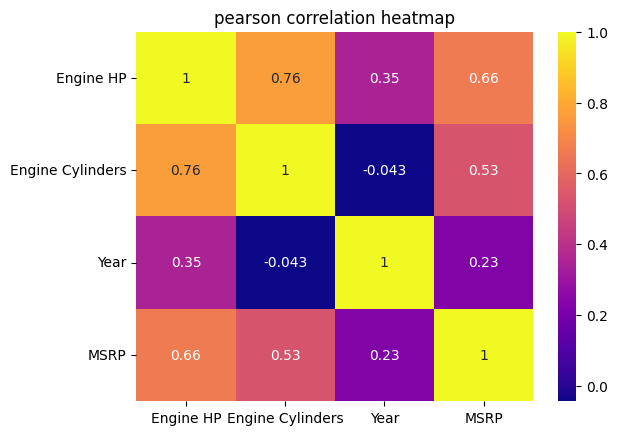

In [69]:
#work on hypothesis test
corr_matrix=cdf[["Engine HP","Engine Cylinders","Year","MSRP"]].corr(method='pearson')
corr_matrix

sns.heatmap(corr_matrix,annot=True,cmap="plasma")
plt.title("pearson correlation heatmap")
plt.show

# Correlation visualisations


<function matplotlib.pyplot.show(close=None, block=None)>

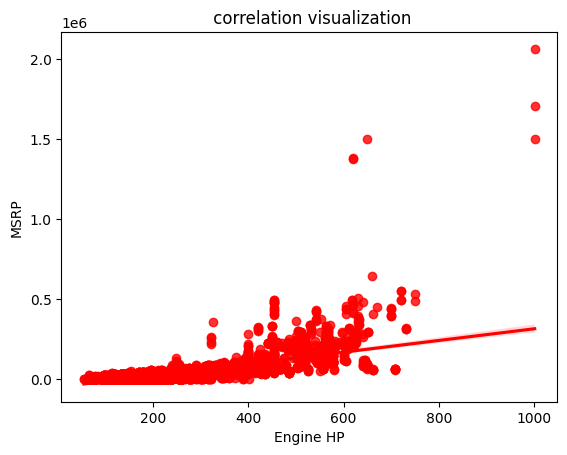

In [70]:
sns.regplot(x="Engine HP",y="MSRP", data=cdf, color="r")
plt.title(" correlation visualization")
plt.show

# Feature engineering
1. MPG_avg
2. power/cylinder
3. ohe(fuel,transimission type ,driven wheels,vehicel style,vehicle size)
4. drop sparse columns(model,market category)




In [71]:
#1 
cdf["Avg_MPG"]=(cdf["highway MPG"]+cdf["city mpg"])/2

#2
cdf["HP_per_Cylinders"]=cdf["Engine HP"] / cdf["Engine Cylinders"]

#3
car_df=pd.get_dummies(cdf,columns=["Transmission Type","Engine Fuel Type","Driven_Wheels"],drop_first=False)

#4
car_df=car_df.drop(columns=["Model"])



#cdf ..>>.. car_df

In [72]:
car_df.shape

(11914, 33)

# Devloping Linear regression models

**1. Simple linear refression model**
* creating a model to predict the price of car using Engine HP
* ploting actual value vs model predicted values

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
slrm = LinearRegression()
x=car_df[["Engine HP"]]
y=car_df["MSRP"]
slrm.fit(x,y)
slrmpp=slrm.predict(x)
print(slrmpp)
print("intercept: ",slrm.intercept_)
print("slope: ",slrm.coef_)

# ->>> implies price = -50503 + 365 * Engine HP

[71868.50876245 59083.41629582 59083.41629582 ... 59083.41629582
 59083.41629582 30225.63615688]
intercept:  -50503.0905609318
slope:  [365.28835619]


(0.0, 2.218880076589199e-05)

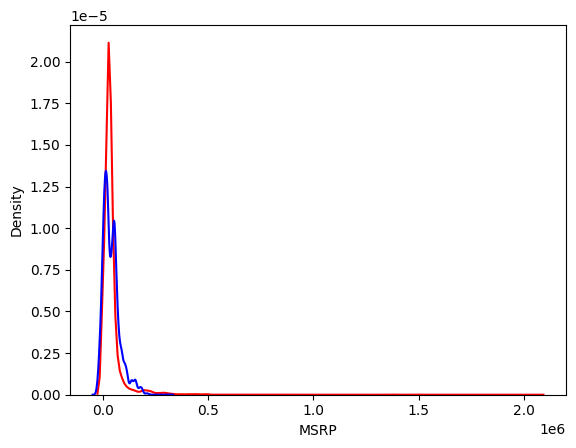

In [74]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

ax3=sns.kdeplot(car_df["MSRP"],color="r",label="Actual value")
sns.kdeplot(slrmpp,color="b",label="Fitted values",ax=ax3)
plt.ylim(0,)

In [75]:
print("R squared value : ",r2_score(y,slrmpp))
print("Mean squared error value : ",np.sqrt(mean_squared_error(y,slrmpp)))

R squared value :  0.43777304928228944
Mean squared error value :  45068.99299380562


**2.Multiple Linear Regression model**
* creating a model to predict price of car using multiple features
* ploting actual value vs model predicted values

In [76]:
mlrm=LinearRegression()
x_ml=car_df.drop(columns=["log-MSRP","Popularity","MSRP","Vehicle Style","highway MPG","Vehicle Size","city mpg","Engine HP","Engine Cylinders","Make","HP_per_Cylinders"])
y_ml=car_df[["MSRP"]]
mlrm.fit(x_ml,y_ml)
mlrmpp=mlrm.predict(x_ml).round(2)
print("List of Model predicted values: ",mlrmpp[:5])
print("intercept : ",mlrm.intercept_)
print("slope : ",mlrm.coef_)
# ->>> implies price = -3769278 + slope1 * feature1 + slope2 * feature2.......

List of Model predicted values:  [[88612.03]
 [85776.29]
 [84358.42]
 [87194.16]
 [87194.16]]
intercept :  [-3816681.23769997]
slope :  [[  1981.88268499  -6640.17392627  -2835.74122172  24665.85686156
  -12413.40326244  39780.04580143 -19072.86034295 -32959.6390576
  -17253.65313631 154341.27705503 -31006.1188209   70032.68790944
  -46567.66238692 -45680.48085438 -22216.74078626 -37919.59183508
   14904.35493435 -38634.07207897   1583.28182954  -7168.56263561
    4605.05689543    980.22391064]]


(0.0, 2.218880076589199e-05)

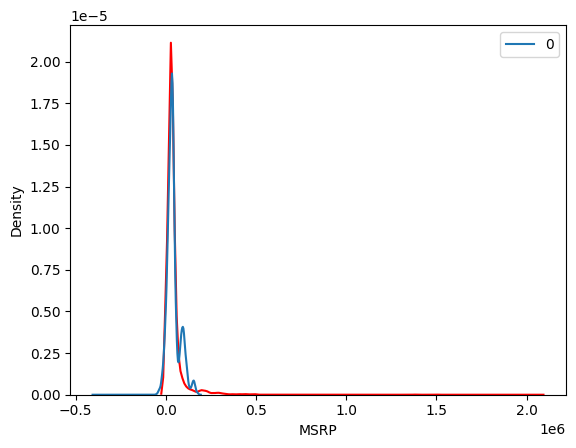

In [77]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

ax1=sns.kdeplot(car_df["MSRP"],color="r",label="Actual value")
sns.kdeplot(mlrmpp,color="b",label="Fitted values",ax=ax1)
plt.ylim(0,)

**3.Polynomial Regression model**
* predict price of car based on horse power


In [78]:
x_pr=car_df["Engine HP"]
y_pr=car_df["MSRP"]
#now fit a polynomial of certain degree
fit_poly=np.polyfit(x_pr,y_pr,3)
#function
fn_poly=np.poly1d(fit_poly)
#predicted price per HP
pp_poly=fn_poly(x_pr)
print(f"polynomial coeficients : {fit_poly}")
print("Price for a car of 300 HP: ",fn_poly(300))

polynomial coeficients : [ 2.83021302e-03 -1.93100723e+00  5.94491983e+02 -3.84031876e+04]
Price for a car of 300 HP:  42569.50787193763


**4. Multivariate polynomial regression model**
* used multiple features for training the data
* evaluated the actual values and model predicted values using distribution plot

In [79]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
x_mvpr=car_df[["Engine HP","Engine Cylinders","Year"]]
y_mvpr=car_df["MSRP"]
#polynomial transform
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x_mvpr)
#model training
mvprm=LinearRegression()
mvprm.fit(x_poly,y_mvpr)
#predict
yhat_mvprm=mvprm.predict(x_poly)
yhat_mvprm[:10]
print("R^2 value of the model is: ",r2_score(y_mvpr, yhat_mvprm),"\nThe R squared value is close to 1 indicates strong accuracy in model predictions")

R^2 value of the model is:  0.8103510724464427 
The R squared value is close to 1 indicates strong accuracy in model predictions


<Axes: xlabel='MSRP', ylabel='Density'>

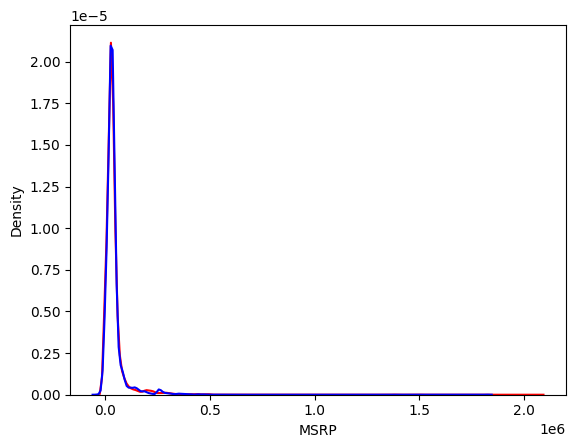

In [80]:
ax2=sns.kdeplot(car_df["MSRP"],color="r",label="Actual values")
sns.kdeplot(yhat_mvprm,color="b",label="Multivariate Poly Model predicted values",ax=ax2)

**5.multivariate polynomial regression model  by fiting scaled values**

In [87]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

x_mvprs=car_df[["Engine HP","Engine Cylinders","Year"]]
y_mvprs=car_df["MSRP"]

#build a pipeline

pipe=Pipeline([("scaler",StandardScaler()),("poly",PolynomialFeatures()),("linreg",LinearRegression())])

#fit values to the pipe model 

pipe.fit(x_mvprs,y_mvprs)
predicted_price=pipe.predict(x_mvprs)
predicted_price[:10]

print("r^2 value: ",r2_score(y_mvprs,predicted_price))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
r^2 value:  0.6959170549536089


<Axes: xlabel='MSRP', ylabel='Density'>

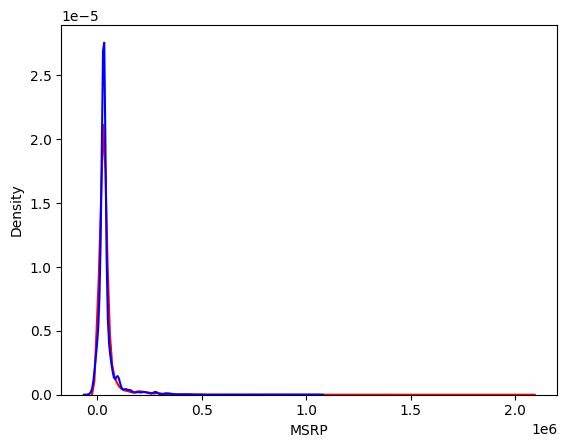

In [82]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

actv=sns.kdeplot(car_df["MSRP"],color="r",label="Actual values")
sns.kdeplot(predicted_price,color="b",label="Model predicted values",ax=actv)

# Data splitting and pipelining polynomial model


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
X=car_df[["Engine HP","Engine Cylinders","Year"]]
y=car_df["log-MSRP"]

#spliting into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#build pipeline
model=Pipeline([("scaler",StandardScaler()),("poly",PolynomialFeatures()),("linreg",LinearRegression())])

#Train on training data
model.fit(X_train,y_train)

#Predict on both train & test sets
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

#Evaluate
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))


Train R²: 0.8630647072602686
Test R²: 0.867349971740447
Train RMSE: 0.4074099605217348
Test RMSE: 0.4096055740482266
Train MAE: 0.28821137312461176
Test MAE: 0.2931755085422206


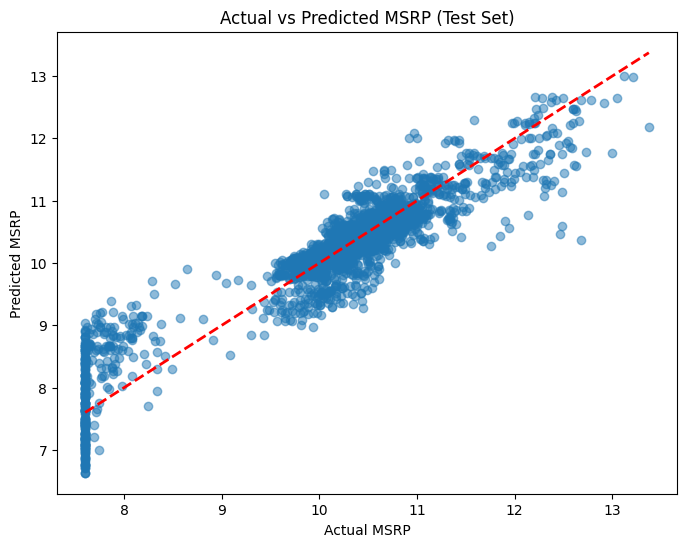

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)

# Add reference line (perfect predictions)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)

plt.xlabel("Actual MSRP")
plt.ylabel("Predicted MSRP")
plt.title("Actual vs Predicted MSRP (Test Set)")
plt.show()


# Ridge regression model using pipelining.
* **Ridge regression with gridsearchCV**
* **comparitive visualization on actual MSRP vs predicted MSRP**

In [88]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X=car_df[["Engine HP","Engine Cylinders","Year"]]
y=car_df["MSRP"]

#spliting into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Pipeline
pipe = Pipeline([("scaler", StandardScaler()),("poly", PolynomialFeatures()),  ("ridge", Ridge())])

#seting up parameter grid; tune polynomial degree and alpha (regularization strength)
param_grid = {"poly__degree": [1, 2, 3, 4],"ridge__alpha": [0.01, 0.1, 1, 10, 100, 1000]}

#GridSearchCV
grid=GridSearchCV(pipe,param_grid,cv=5,scoring="r2",n_jobs=-1) #searches the best poly degree and alpha value
grid.fit(X_train,y_train) #train the model using best values

print("Best Parameters:", grid.best_params_)
print("Best CV Score (R²):", grid.best_score_)

#Best model
final_model = grid.best_estimator_  #generating a good model using the best poly degree and alpha value from gridsearchCV

#Predictions
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred[:10]
#Evaluation
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))


Best Parameters: {'poly__degree': 4, 'ridge__alpha': 10}
Best CV Score (R²): 0.7987228281719994
Train R²: 0.809757637873033
Test R²: 0.8339761073971621
Train RMSE: 27308.14771917829
Test RMSE: 19892.952675529486
Train MAE: 10403.511210616742
Test MAE: 10012.658029298787


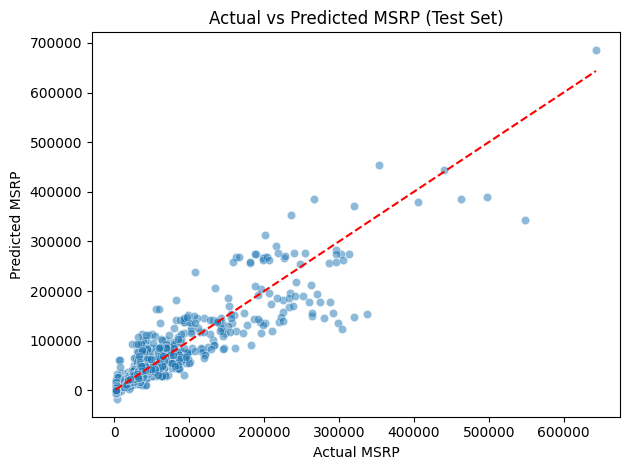

In [86]:
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MSRP")
plt.ylabel("Predicted MSRP")
plt.title("Actual vs Predicted MSRP (Test Set)")
plt.tight_layout()
plt.show()

# Insights

- `Engine HP` and `Year` are strong predictors of MSRP, while `Engine Cylinders` adds moderate contribution.
- **Multivariate polynomial regression model** seems to be **more accurate** shows the distribution plot and R squared value.
- The tuned **Ridge Regression** model generalizes well, with good test R² and relatively low RMSE/MAE.  
- The chosen polynomial degree suggests that **non-linear patterns** exist in the data, but excessive complexity (higher degrees) may lead to overfitting.
- Grouping car features with target mean values gives us a avg price based on the grouped features.  

